<a href="https://colab.research.google.com/github/tincorpai/Deep_Learning_Pytorch/blob/master/PyTorch_Neural_Network_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Neural Network Classification

## What is Classification problem?

A classification problem in machine leaning or in deep learning is the one in which a class label is awarded for a specific example of an input data.

A typical example of classification is example of three containers 1, 2, and 3 have red, blue, and green balls respectively. Assuming we have a new ball and we are asked to place the new ball in a container it belongs to. The problem here is a classification probelm because we have to classify which container the ball belongs to. This will depends on the ball's feature such as color. For instance if the ball is red, it will be placed in a container already containing red balls.

In Deep Learning and in machine learning, classification problems are solved by training classificato models. These models are trained by providing objects and their labels. The models learns similar features of objects in a class. After training, the model is tested on a seperate data it was trained. For testing, only the object to classify is given without its label. The classification model predicts the label of the object. The accuracy of the model depends on the basis of correctly predicted labels.


Diffent Types of Classification problem:

* Binary Classification:  The classification problem in which the number of classes is 2.

* Multi Class Classification:  A classification problems in which the number of classes is more than 2.

* Multi-Label- Classification:  A classification problem in which a labels belongs to more than one classes.

* Imbalanced Classification:  A classification problem in which the number of objects in classes are imbalanced.

### The following are important part of this project:

*   Architecture of a neural network classification model

*   Input shapes and output shapes of a classication model (features and labels)

*   Creating custom data to view, fit on and predict on 

*   Steps in modelling

     * Creating a model, setting a loss function and optimiser, creating a training loop, evaluating a model.

*   Saving and loading models 

*   Hanessing the power of non-linearity 

*   Different classification evaluation methods.


## Classification Problem: Input and Output

A typical example is having a set of input images and we want to build an application that will classify images according to their category of similarities. We perform this classification under three model's architecture:

*   Input 

*   Machine Learning algorithm

*   Output.

1) Input values
Let's say inputs that we want to classify are set of photos the first thing is to write a code that will numerically represent an image by taking it's width = 224, it's height = 224 and its C = 3. It's channels are Red, Green and Blue.


Create a numerical encoding which is normalized pixel values and then import the pixel values of these images into a Machine Learning Algorithm then output our prediction probabilities.

Then write codes to transfer probabilities into labels.

With more training and data, we can improve our predicton.


The tensor shapes is of the form:  [batch_size, colour_channels, width, height]

Shape = [None, 3, 224, 224] or shape = [32, 3, 224, 224]


Batch_size is the number of samples processed before the model is updated.

For the image problem, it means our computer looks at 32 images at a time.

The number of epoch is the number of complete passes through the training dataset.


The output shape could be two, three or could be multiple shapes.

**Note** The output shapes varies with whatever problem you are working on. The principle of putting your data as a numerical representation stays the same for any images classification problems.

## Architecture of a classification model



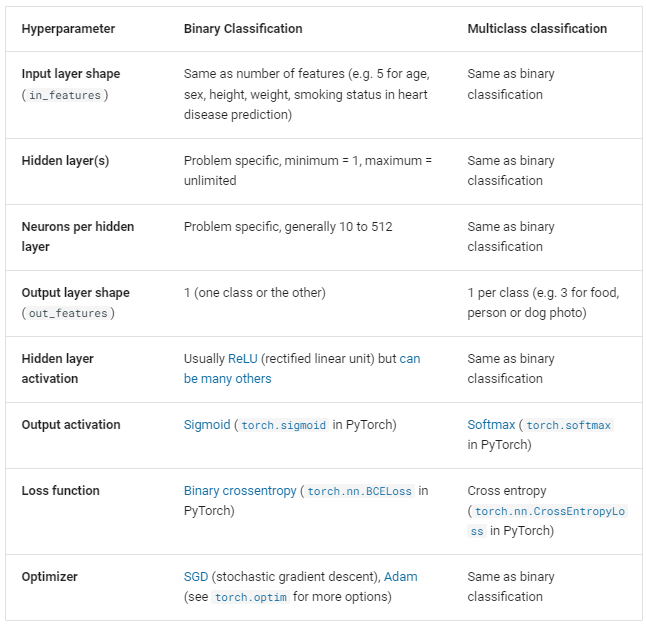


# 02. Neural Netwwork Classification with PyTorch

## Geting our dataset ready

### Make Classification data and get it ready

To start with, we will create our own dataset starting by importing some packages:



In [1]:
import sklearn
from sklearn.datasets import make_circles

# Make a 1000 samples 
n_samples = 1000

#  Create circles
X, y = make_circles(n_samples,
                   noise = 0.03,
                     random_state = 42)   #random state is equivalent to setting up a random seed.

In [2]:
len(X), len(y)

(1000, 1000)

In [3]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n  {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
  [1 1 1 1 0]


In [4]:
# Make a DataFrame of cicle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],  #Renaming each feature in X as X1 or X2
                        "X2":X[:, 1], 
                       "label":y})

In [5]:
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


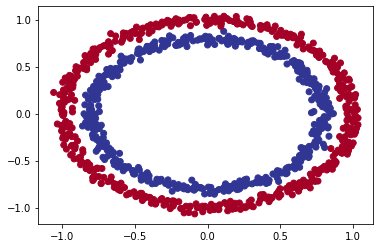

In [6]:
# Visualize the dataset.
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

What we want to do is that given two numbers, we want to predict if it is a red dot or a blue dot. 

Note: that this a toy dataset, a dataset that is small enough to experiment but still sizeable anough to practice the fundamental of neural network classification.

Checkout this link for more information: https://scikit-learn.org/stable/datasets/toy_dataset.html

### Turning our dataset into tensors


#### 1.1 Check inut and output shapes

In [7]:
# View the first example of features and labels

X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Values for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")


Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Values for one sample of X: (2,) and the same for y: ()


In [8]:
####1.2 Turning data into tensors and create a train and test splits
import torch
torch.__version__

'1.13.1+cu116'

In [9]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

The reason why we change it to torch.float is that the default type of numpy is float64 we need to change the conversion of numpy to tensor to its default type and which is float64

In [10]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]), tensor([1., 1., 1., 1., 0.]))

In [11]:
y.dtype, X.dtype, type(X)

(torch.float32, torch.float32, torch.Tensor)

In [12]:
torch.manual_seed(42)

In [13]:
# Split data into trainig and testing set. 
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, #0.2 = 20 of testing data and 80% of the training set,
                                                    random_state = 42)

In [14]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [15]:
n_samples

1000

### 2. Building a model


Let's build a model to classify our blue and red dots.

To do so, we want to:

1) Setup device agnostic code so our code will run on an accelerator (GPU) if there is one

2) Construct a model (by subclassing `nn.module`)

3) Define a loss function and optimizer

4) Create a trainig loop and test loop.

#### Setup Agnostic Device 

In [16]:
# Import PyTorch and nn
import torch
from torch import nn


#MAke device agnostic code 
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [17]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

#### Construct model


Now we've setup device agnostic code, let's create a model that:

1) Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)

2) Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data.

3) Defines a `forward()` method that outlines the forward pass (or computation) of the model. This is because we are subclassing `nn.module`

4) Instatiate an instance of our model class and send it to the target device.

In [18]:
#2 Construct a model that subclasses nn.Module

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    #2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2, out_features=5) #takes in 2 features and upscales to  features.
    #the reason for upscaling is because the more hidden layers there are the more oppurtunity  our model is to learn more pattern in the data.
    #the in_feature of the second layer must map with the out_feature of the first layer
    self.layer_2 = nn.Linear(in_features=5, out_features=1) #takes in 5 features from previos layer and outputs a single feature (same shape as y)

  #3. Define a forwad() method that outlines the forward pass
  def forward(self, x):
    return self.layer_2(self.layer_1(x))  # x-> layer_1 -> layer_2 -> output
    #our training data goes into layer_1 and perform a linear calculation 
    # and goes into layer_2 and layer 2 into output 

#4. Instantiate an instance of our model class and send it to the target device.
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [19]:
device

'cuda'

In [20]:
next(model_0.parameters()).device #It means model's parameters are on cuda device.

device(type='cuda', index=0)

In [21]:
# Let's replicate the model ablove using nn.Sequential()

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

In [22]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [23]:
#3 nn.Sequential version of code 2 
# Construct a model that subclasses nn.Module

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.two_linear_layers = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
    )

  #3. Define a forwad() method that outlines the forward pass
  def forward(self, x):
    return two_linear_layers(x)  # x-> layer_1 -> layer_2 -> output
    #our training data goes into layer_1 and perform a linear calculation 
    # and goes into layer_2 and layer 2 into output 

#4. Instantiate an instance of our model class and send it to the target device.
model_1 = CircleModelV0().to(device)
model_1

CircleModelV0(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [24]:
model_0.state_dict()

OrderedDict([('0.weight', tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [28]:
#make some predictions with random numbers

with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))   #predict the the label of each X_test value.
print(f"Length of predictions:  {len(untrained_preds)}, shape:  {untrained_preds.shape}")
print(f"length of the test samples: {len(X_test)}, Spape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions:  200, shape:  torch.Size([200, 1])
length of the test samples: 200, Spape: torch.Size([200, 2])

First 10 predictions:
tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


#### 2.1 Setup loss function and optimizer

Which loss function or optimizer should you use?

Again, this is problem specific

For example for regression you might want MAE or MSE (mean absolute error or mean squared error).

For classification, you might want to use cross entropy or categorical entropy 
(cross entropy).


As a reminder, the loss function measures how wrong our models predictions are:

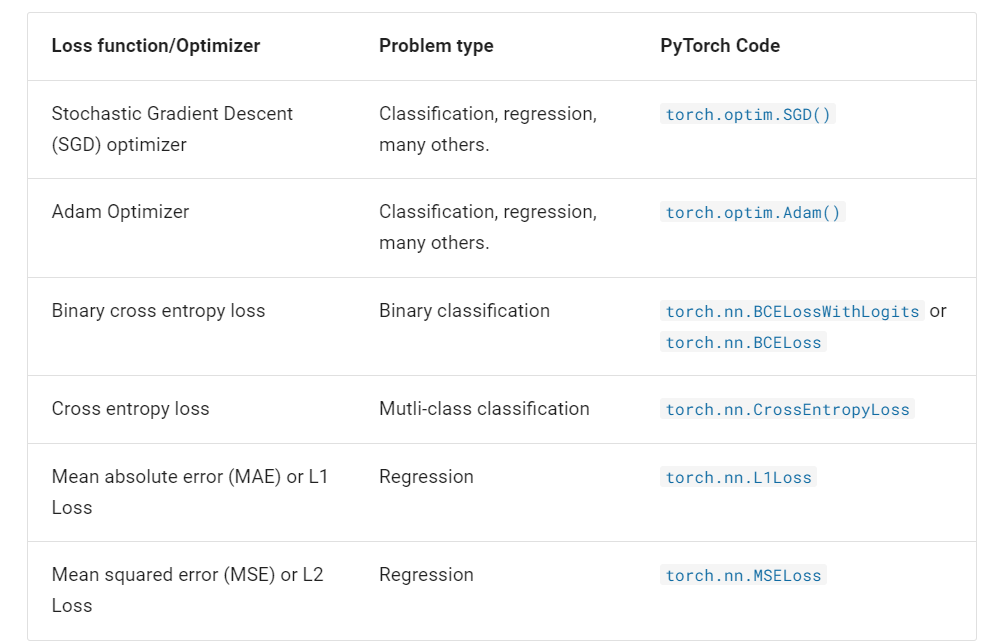